In [97]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading and Preprocessing**

In [99]:
stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock_LSTM/FINAL_FROM_DF.csv')

In [100]:
stock.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [146]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   SYMBOL       846404 non-null  object        
 1   SERIES       843947 non-null  object        
 2   OPEN         846404 non-null  float64       
 3   HIGH         846404 non-null  float64       
 4   LOW          846404 non-null  float64       
 5   CLOSE        846404 non-null  float64       
 6   LAST         846404 non-null  float64       
 7   PREVCLOSE    846404 non-null  float64       
 8   TOTTRDQTY    846404 non-null  int64         
 9   TOTTRDVAL    846404 non-null  float64       
 10  TIMESTAMP    846404 non-null  datetime64[ns]
 11  TOTALTRADES  846404 non-null  int64         
 12  ISIN         846404 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 83.9+ MB


In [149]:
stock.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
count,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,8.464040e+05,8.464040e+05,846404,8.464040e+05
mean,561.258797,568.679340,553.861861,560.815168,560.184430,560.225320,6.983800e+05,1.334592e+08,2017-01-08 15:02:55.422611200,5.013823e+03
min,0.050000,0.050000,0.050000,0.050000,0.000000,0.050000,1.000000e+00,5.000000e-02,2016-01-01 00:00:00,1.000000e+00
25%,39.900000,40.850000,38.850000,39.750000,39.600000,39.700000,6.628000e+03,6.071941e+05,2016-07-12 00:00:00,8.400000e+01
50%,139.200000,142.050000,136.150000,138.900000,138.450000,138.750000,4.429200e+04,5.321067e+06,2017-01-12 00:00:00,6.000000e+02
75%,490.000000,499.550000,481.100000,489.550000,488.500000,489.150000,2.757322e+05,3.711093e+07,2017-07-11 00:00:00,3.028000e+03
max,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,7.818365e+08,1.426400e+11,2017-12-29 00:00:00,1.192900e+06
std,2005.760598,2027.159199,1983.412783,2004.576315,2003.900793,2000.362761,4.055630e+06,6.296968e+08,NaN,1.490112e+04


In [150]:
# checkind symbols with max data entries
stock['SYMBOL'].value_counts()

,count
SYMBOL,
SRTRANSFIN,4709
IDFCBANK,4379
IRFC,4362
NHAI,3360
RECLTD,2919
...,...
M17RD,1
CP7RG,1
IPRU2814,1


In [151]:
# change date column to datetime
stock['TIMESTAMP'] = pd.to_datetime(stock['TIMESTAMP'])

In [152]:
# select where symbol is RECLTD and series is EQ
rec = stock[(stock['SYMBOL'] == 'RECLTD') & (stock['SERIES'] == 'EQ')]

In [153]:
# set index as date
rec.set_index('TIMESTAMP', inplace=True)

In [154]:
# sort by date
rec = rec.sort_values(by='TIMESTAMP', ascending=True)

# **EDA**

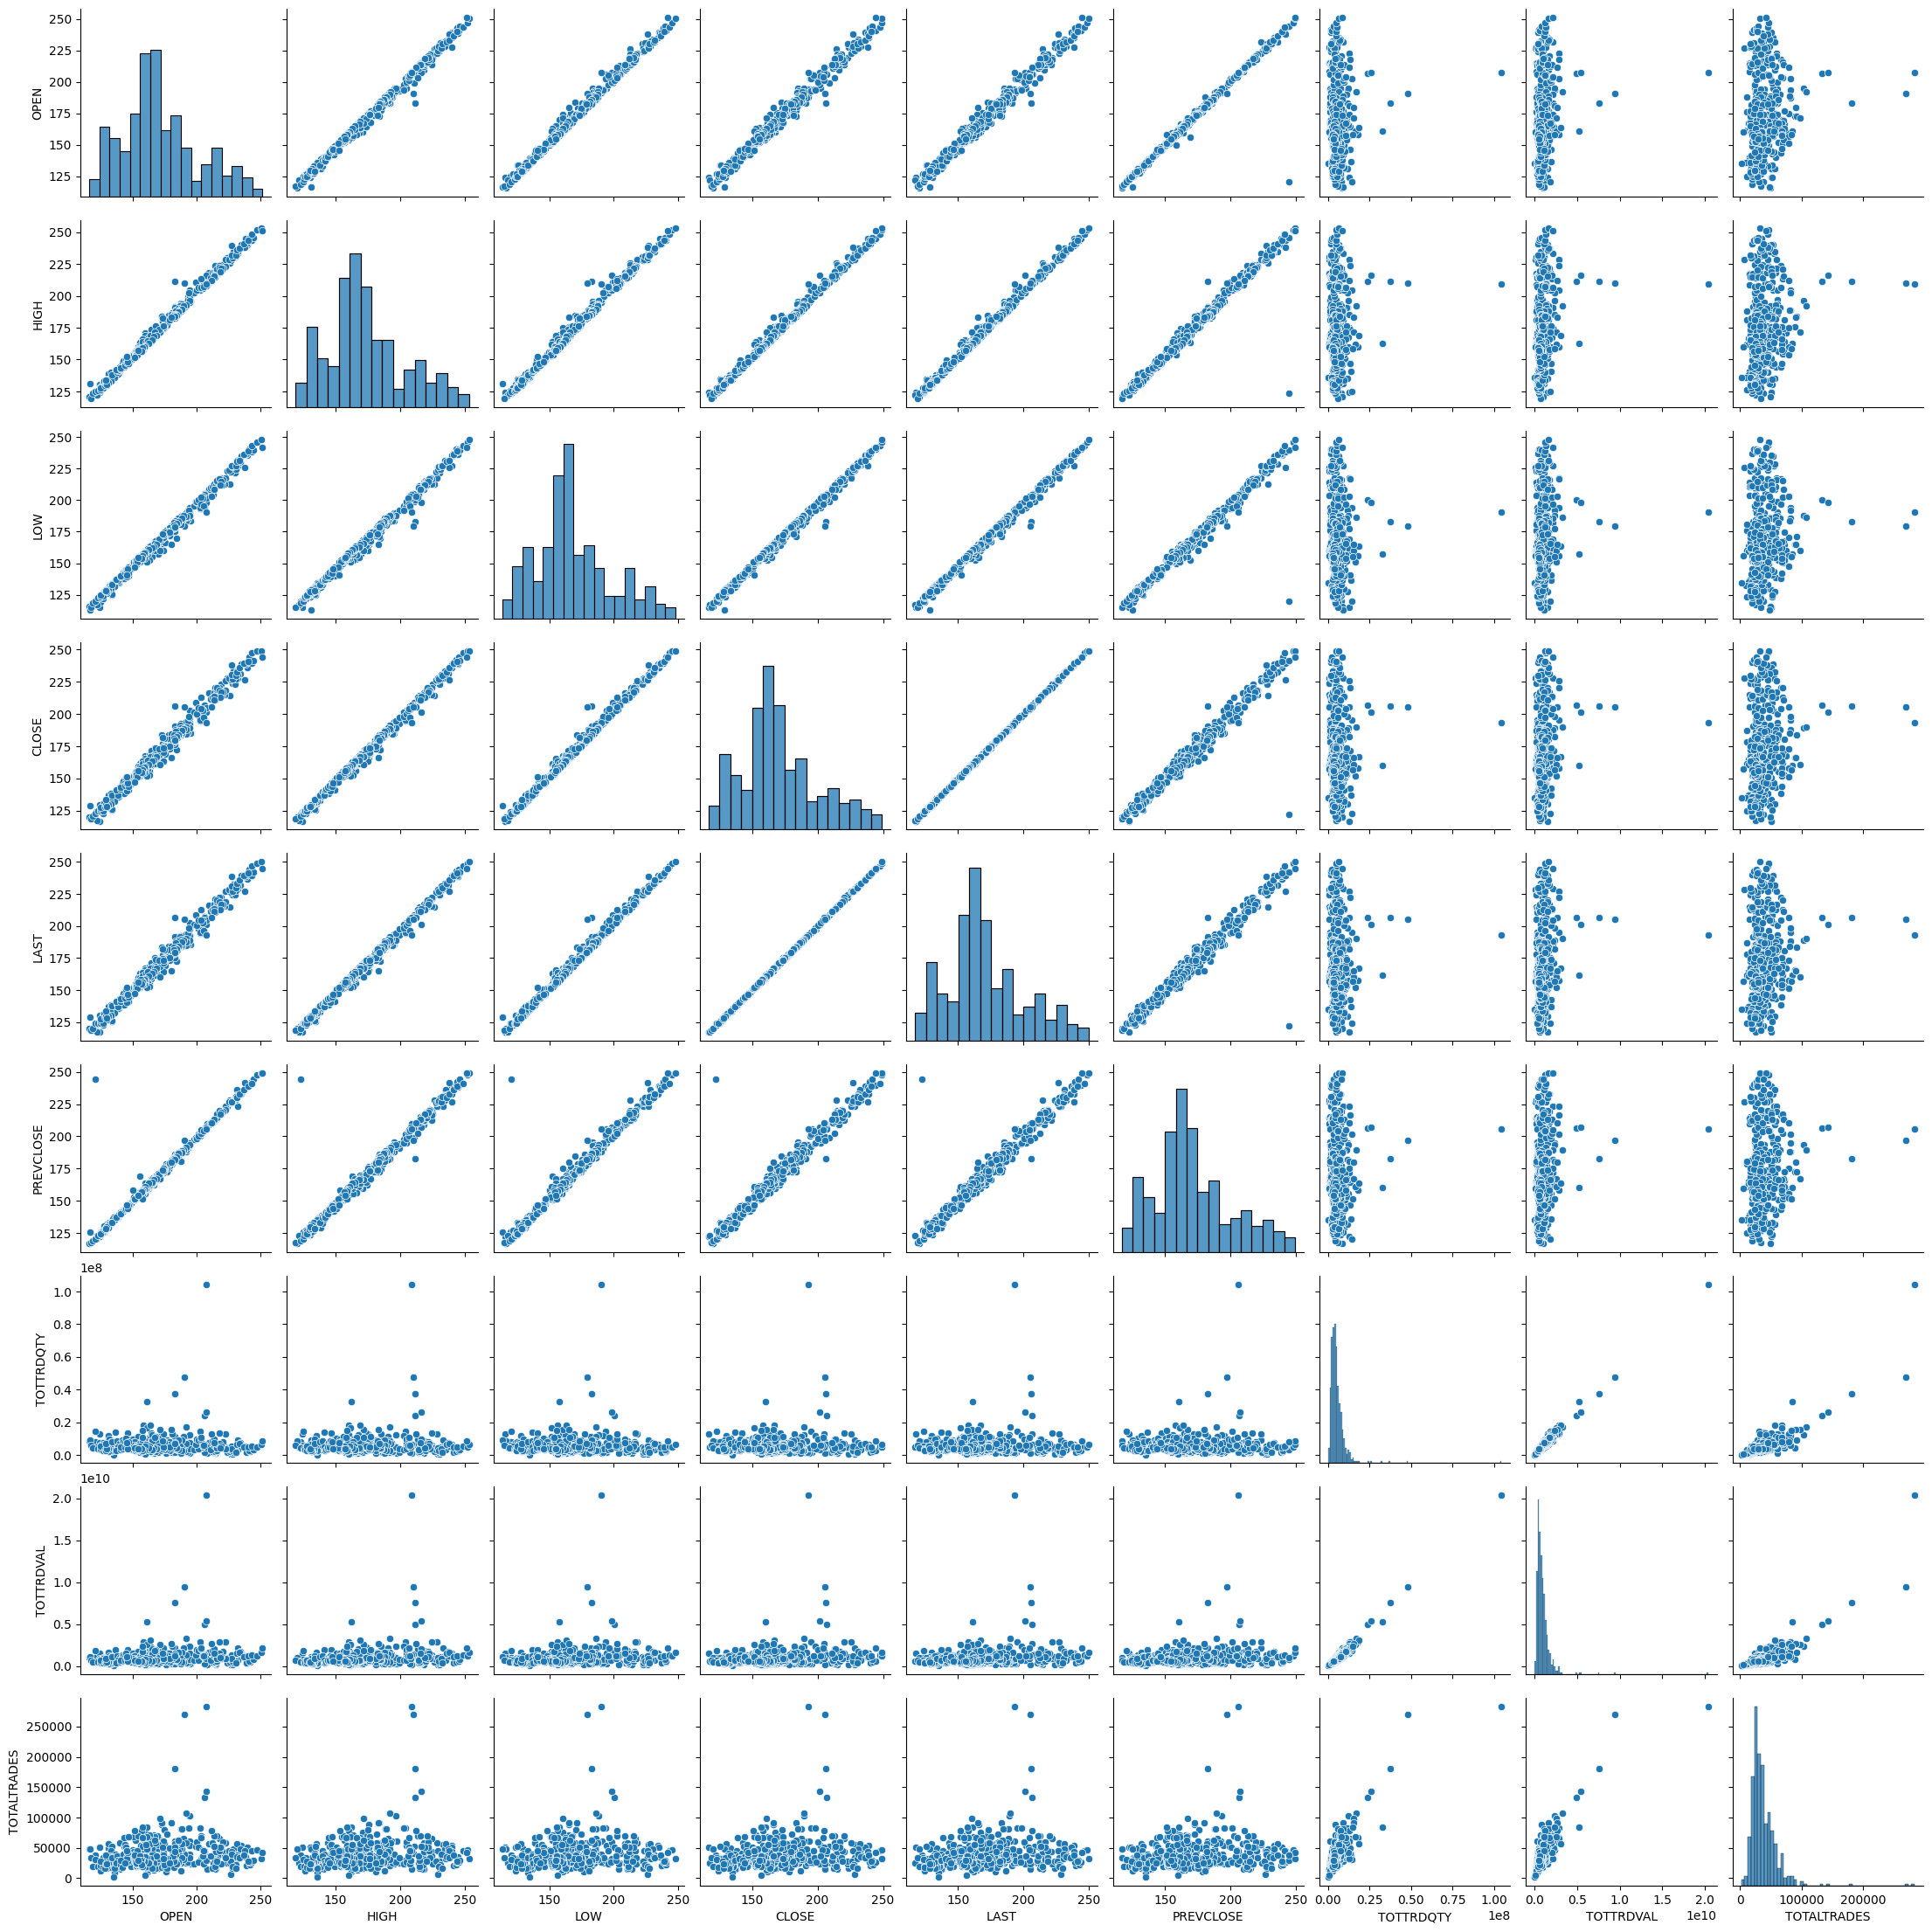

In [157]:
# lets plot pairplot for better understanding
import seaborn as sns

sns.pairplot(rec)
plt.show()

In [159]:
# selecting only close feature to predict the furure price
rec = rec['CLOSE']

In [160]:
rec

,CLOSE
TIMESTAMP,
2016-01-01,228.15
2016-01-04,223.55
2016-01-05,227.90
2016-01-06,228.30
2016-01-07,214.30
...,...
2017-12-22,156.65
2017-12-26,157.75
2017-12-27,156.65


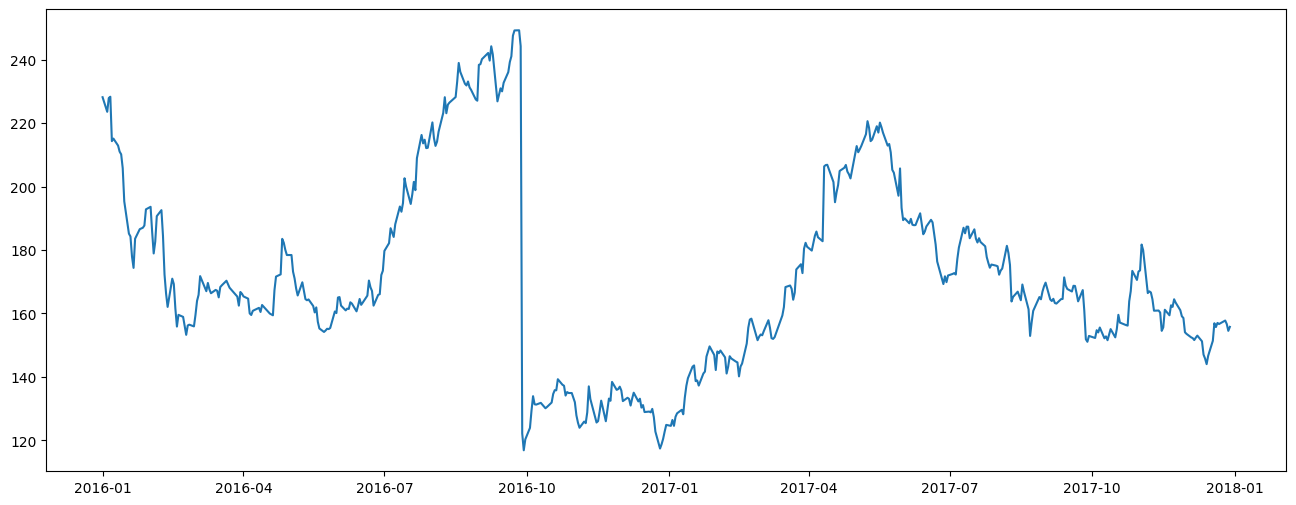

In [161]:
# plotting the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(rec)

In [108]:
rec.shape

(495,)

# **Feature Engineering**

In [110]:
# LSTM are sensitive to the scale so we apply MInMax scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rec = scaler.fit_transform(np.array(rec).reshape(-1,1))

In [111]:
# splitting dataset into train and test split
training_size = int(len(rec)*0.65)
test_size = len(rec) - training_size
train_data, test_data = rec[0:training_size,:], rec[training_size:len(rec),:1]

In [112]:
training_size, test_size

(321, 174)

In [113]:
len(train_data), len(test_data)

(321, 174)

In [114]:
# convert an array of values to dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [115]:
# reshaping
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [116]:
print(X_train)

[[0.84063444 0.80589124 0.83874622 ... 0.36593656 0.34441088 0.37688822]
 [0.80589124 0.83874622 0.84176737 ... 0.34441088 0.37688822 0.37273414]
 [0.83874622 0.84176737 0.73602719 ... 0.37688822 0.37273414 0.3663142 ]
 ...
 [0.19901813 0.20203927 0.16465257 ... 0.67598187 0.67900302 0.67975831]
 [0.20203927 0.16465257 0.16616314 ... 0.67900302 0.67975831 0.63859517]
 [0.16465257 0.16616314 0.15407855 ... 0.67975831 0.63859517 0.59063444]]


In [117]:
print(X_train.shape), print(y_train.shape)

(260, 60)
(260,)


(None, None)

In [118]:
print(X_test.shape), print(y_test.shape)

(113, 60)
(113,)


(None, None)

In [119]:
# reshape input to be required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Model Selection and Model Building**

In [120]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [123]:
# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 0.0896 - val_loss: 0.0033
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0349 - val_loss: 0.0038
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0234 - val_loss: 0.0037
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0274 - val_loss: 0.0047
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0158 - val_loss: 0.0062
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0228 - val_loss: 0.0052
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0136 - val_loss: 0.0030
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0160 - val_loss: 0.0031
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0126 - val_loss: 0.0022
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0181 - val_loss: 0.0087
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0122 - val_loss: 0.0026
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms

In [124]:
# do prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [125]:
# transform back to orginal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [126]:
# calculate RMSE prformance metrics
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

169.9374735292311

In [127]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

164.87154520905102

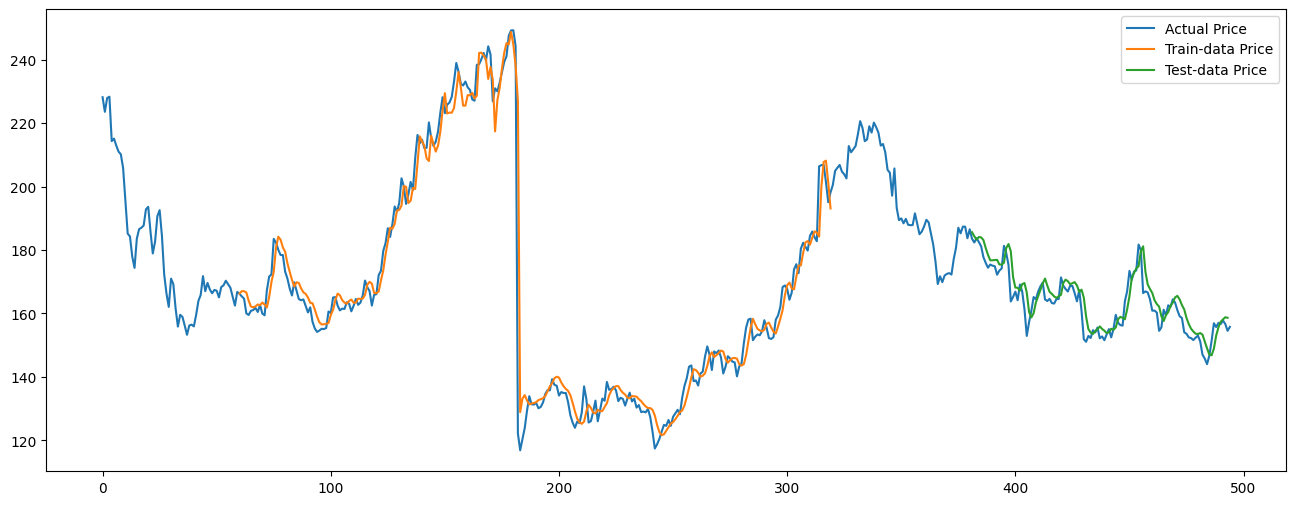

In [128]:
# plotting
# shift train prediction for plotting

look_back = 60
trainPredictPlot = np.empty_like(rec)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction for plotting
testPredictPlot = np.empty_like(rec)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(rec)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(16,6))
plt.plot(scaler.inverse_transform(rec), label ='Actual Price')
plt.plot(trainPredictPlot, label ='Train-data Price')
plt.plot(testPredictPlot, label ='Test-data Price')
plt.legend()
plt.show()

In [129]:
len(test_data)

174

In [130]:
X_input = test_data[len(test_data)-60:].reshape(1,-1)
X_input.shape

(1, 60)

In [131]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [132]:
from re import X
#demonstrate prediction for next 15 days
from numpy import array

lst_output = []
n_steps = 60
i = 0
while(i<15):
  if(len(temp_input)>60):
    #print(temp_input)
    X_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, X_input))
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1, n_steps, 1))
    #print(X_input)
    y_pred = model.predict(X_input, verbose=0)
    print("{} day output {}".format(i, y_pred))
    temp_input.extend(y_pred[0].tolist())
    temp_input = temp_input[1:]
    print(temp_input)
    lst_output.extend(y_pred.tolist())
    i = i+1
  else:
    X_input = X_input.reshape((1, n_steps, 1))
    y_pred = model.predict(X_input, verbose=0)
    print(y_pred[0])
    temp_input.extend(y_pred[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_pred.tolist())
    i = i+1

print(lst_output)

[0.3033051]
61
1 day input [0.29229607 0.26661631 0.27114804 0.26208459 0.27567976 0.28851964
 0.26888218 0.28889728 0.32250755 0.30400302 0.29796073 0.29682779
 0.35460725 0.37915408 0.4271148  0.40558912 0.42560423 0.42824773
 0.48980363 0.4765861  0.37424471 0.37839879 0.37575529 0.35951662
 0.33232628 0.33270393 0.32779456 0.28436556 0.29267372 0.33459215
 0.32137462 0.34516616 0.34138973 0.35951662 0.3515861  0.33345921
 0.31910876 0.31495468 0.28096677 0.27719033 0.26888218 0.26699396
 0.26246224 0.26812689 0.27303625 0.25944109 0.22771903 0.21827795
 0.20506042 0.22507553 0.26057402 0.30249245 0.293429   0.30324773
 0.30060423 0.30891239 0.30060423 0.28436556 0.29380665 0.30330509]
1 day output [[0.30702996]]
[0.2922960725075531, 0.2666163141993959, 0.2711480362537765, 0.26208459214501534, 0.27567975830815705, 0.28851963746223575, 0.2688821752265861, 0.2888972809667675, 0.3225075528700908, 0.30400302114803635, 0.29796072507552884, 0.29682779456193364, 0.3546072507552872, 0.37915

In [133]:
day_new = np.arange(1, 16)
day_pred = np.arange(16, 31)

In [134]:
len(rec)

495

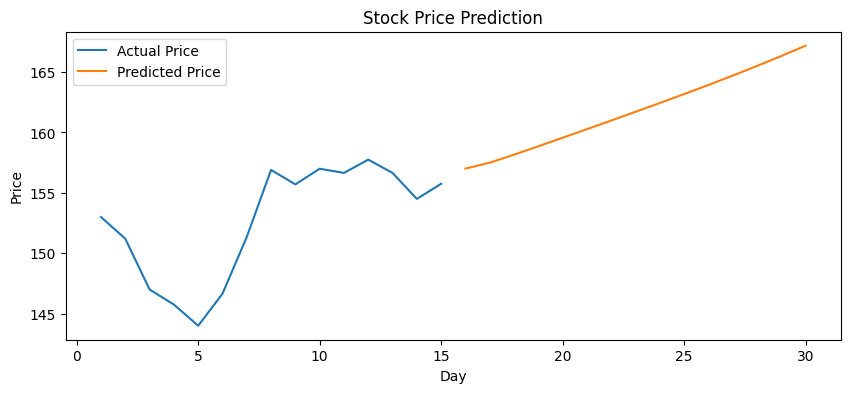

In [144]:
plt.figure(figsize=(10,4))
plt.plot(day_new, scaler.inverse_transform(rec[480:]), label='Actual Price')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [135]:
df3 = rec.tolist()
df3.extend(lst_output)

Text(0, 0.5, 'Stock Price')

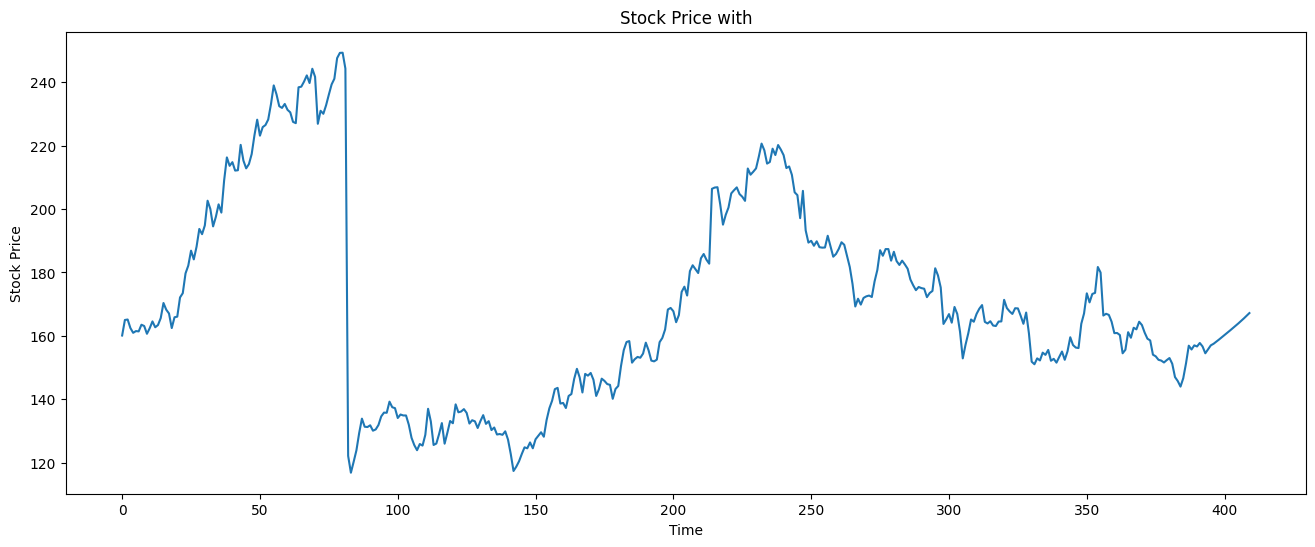

In [145]:
df3 = rec.tolist()
df3.extend(lst_output)
plt.figure(figsize=(16,6))
plt.plot(scaler.inverse_transform(df3[100:]))
plt.title('Stock Price with')
plt.xlabel('Time')
plt.ylabel('Stock Price')